In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sortList import sortList
from collider import collider
from sorter import sorter

#npart = int(input('Enter number of simulation particles: '))
npart = 20000
#nstep = int(input('Enter total number of timesteps: '))
nstep = 200

boltz = 1.3806E-23
mass = 6.63E-26         # argon
diam = 3.66E-10         # effective diameter
T = 273.
density = 1.78          # argon gas at STP in kg/m^3
L = 1.0E-6              # system size = 1 micron^3

nactual = density/mass*L**3
eff_num = nactual/npart

print('Each particle represents ',eff_num,' atoms.')

lmbda = L**3/(math.sqrt(2.0)*nactual*math.pi*diam**2)
print('Mean free path = ',lmbda)

ncell_suggested = L/lmbda
print('Suggested number of cells = ',ncell_suggested)

np.random.seed(0)

x = np.empty(npart)
for i in range(npart):
    x[i] = np.random.uniform(0.,L)
v_init = np.sqrt(3.0*boltz*T/mass)
v = np.zeros((npart,3))
for i in range(npart):
    v[i,0] = v_init * (1 - 2*np.floor(2.*np.random.random()))

vmag = np.sqrt(v[:,0]**2+v[:,1]**2+v[:,2]**2)
#plt.hist( vmag, bins=20, range=(0,1000) )
#plt.title('Initial speed distributions')
#plt.xlabel('Speed (m/s)')
#plt.ylabel('N')
#plt.show()

# initialize varibles
ncell = 16
tau = 0.2*(L/ncell)/v_init
vrmax = 3*v_init*np.ones(ncell)
selxtra = np.zeros(ncell)

coeff = 0.5*eff_num*np.pi*diam**2*tau/(L**3/ncell)
coltot = 0

sortData =  sortList(ncell,npart)

for istep in range(nstep):
    
    x = x + v[:,0]*tau
    x = np.remainder(x+L,L)

    sorter(x,L,sortData)

    col = collider(v,vrmax,tau,selxtra,coeff,sortData)
    coltot = coltot + col

vmag = np.sqrt(v[:,0]**2+v[:,1]**2+v[:,2]**2)

# create M-B distribution to plot on top of histogram
sums = 0.0
pb = []
vel = []
for i in range(101):
    vv=i*10
    vel.append(vv)
    pb.append(npart*10*4*math.pi*(math.sqrt(mass/(2*math.pi*boltz*T)))**3*vv*vv*math.exp(-0.5*mass*vv*vv/(boltz*T)))
    sums = sums + pb[i]
    
print (sums)

Each particle represents  1342.3831070889894  atoms.
Mean free path =  6.25844564603975e-08
Suggested number of cells =  15.978408323043993
19990.185043619545


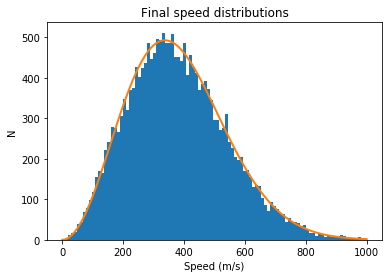

In [2]:
plt.hist( vmag, bins=101, range=(0,1000) )
plt.plot(vel, pb, lw=2)
plt.title('Final speed distributions')
plt.xlabel('Speed (m/s)')
plt.ylabel('N')
plt.show()